In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sklearn

In [3]:
data = pd.read_csv('health_data.csv')
data.head()

,age,restbps,chol,category
0,26,109,243,0
1,27,106,156,0
2,28,107,225,0
3,27,105,277,0
4,30,96,221,0


In [4]:
X = data.to_numpy()[:, :3]
Y = data.to_numpy()[:, 3]
X_00 = data[data['category'] == 0].to_numpy()[:, :3]
X_11 = data[data['category'] == 1].to_numpy()[:, :3]

In [42]:
X_train_0 = np.array(X_00[:280, :3])
X_train_1 = np.array(X_11[:210, :3])

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


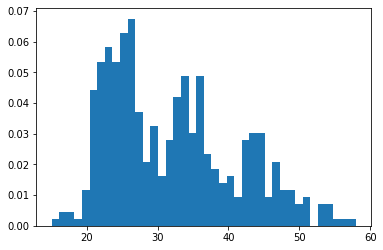

In [30]:
hist1 = plt.hist(X_00[:, 0], bins=40, normed=True)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


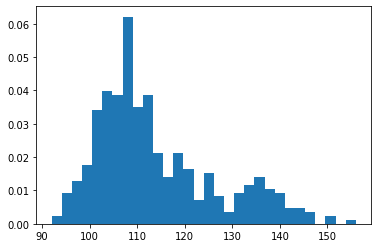

In [22]:
hist2 = plt.hist(X_00[:, 1], bins=30, normed=True)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


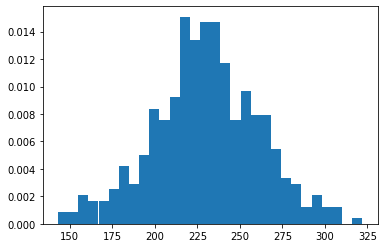

In [23]:
hist3 = plt.hist(X_00[:, 2], bins=30, normed=True)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


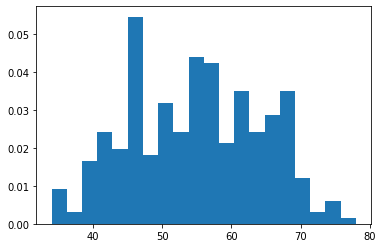

In [35]:
hist11 = plt.hist(X_11[:, 0], bins=20, normed=True)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


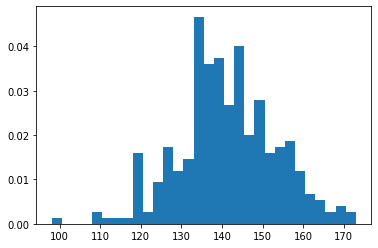

In [25]:
hist12 = plt.hist(X_11[:, 1], bins=30, normed=True)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


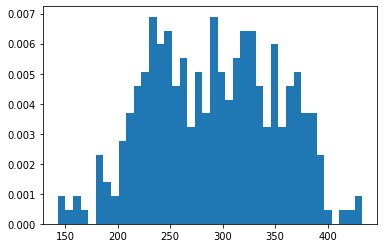

In [32]:
hist13 = plt.hist(X_11[:, 2], bins=40, normed=True)

In [39]:
#Hypercube_Kernel
def hypercube_kernel(h, x, x_i):
    assert (x.shape == x_i.shape)
    return (x - x_i) / (h)


#Window_function   
def parzen_window_func(x_vec):
    for row in x_vec:
        if np.abs(row) > (1/2):
            return 0
    return 1

#Estimation
def parzen_estimation_for_hyper_cube(x_samples, point_x, h, d):
    dimensions = x_samples.shape[1]
    assert (len(point_x) == dimensions)
    k_n = 0
    for row in x_samples:
        x_i = hypercube_kernel(h=h, x=point_x, x_i=row)
        k_n += parzen_window_func(x_i)
    return (k_n / len(x_samples)) / (h**d)

In [40]:
def pdf_multivariate_gauss(x, mu, cov):
    assert(mu.shape[0] > mu.shape[1])
    assert(x.shape[0] > x.shape[1])
    assert(cov.shape[0] == cov.shape[1])
    assert(mu.shape[0] == cov.shape[0])
    assert(mu.shape[0] == x.shape[0])
    part1 = 1 / ( ((2* np.pi)**(len(mu)/2)) * (np.linalg.det(cov)**(1/2)) )
    part2 = (-1/2) * ((x-mu).T.dot(np.linalg.inv(cov))).dot((x-mu))
    return float(part1 * np.exp(part2))

In [41]:
#Gaussian_kernel_and_window_function
def gaussian_window_function(cov, x, x_i):
    assert (x.shape == x_i.shape)
    assert(cov.shape[0] == cov.shape[1])
    assert(x_i.shape[0] == cov.shape[0])
    return pdf_multivariate_gauss(x, x_i,cov)


#Estimation
def parzen_estimation_for_gaussian(x_samples, point_x, cov):
    prob = 0.0
    for row in x_samples:
        prob += gaussian_window_function(cov,point_x,x_i)
    return k_n 